In [1]:
%autoreload 2

from pathlib import Path
import sys

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import xwrf

import metpy.plots as metplots

import holoviews as hv
import hvplot
import hvplot.xarray
import geoviews.feature as gf
import cartopy.crs as ccrs

hv.extension('bokeh') # set plotting backend
xr.set_options(display_style="text")

#from pltbook_xarray import mpas_XYplot

plot_info = {}

plot_info['REFL']      = ['refl10cm', 0, 10, (5,75),       metplots.ctables.registry.get_colortable('NWSReflectivity')]
plot_info['RAINWATER'] = ['qr',       0, 10, (0.0, 0.001), plt.cm.GnBu]

In [22]:
## Files

wrf_file = "/work2/wof/realtime/nature_run/15-03Z_5min/wrfnr_d01_2024-05-08_20*"

ds = xr.open_mfdataset(
        wrf_file,
        engine="netcdf4",
        concat_dim="Time",
        combine="nested",
    ).xwrf.postprocess()

refl = ds['REFL_10CM'][:3,10]



In [23]:
refl.shape

(3, 2751, 3101)

In [24]:
_features = (
    gf.coastline(scale="110m", projection=ccrs.PlateCarree())
    * gf.borders(scale="110m", projection=ccrs.PlateCarree())
    * gf.states(scale="50m", projection=ccrs.PlateCarree())
)

plot = ds.hvplot.quadmesh(
    x='XLONG',
    y='XLAT',
    z='REFL_10CM',
    groupby=['Time',],
    widget_location='bottom',
    title=refl.description,
    cmap=metplots.ctables.registry.get_colortable('NWSReflectivity'),
    clim=(5,75),
    clabel='dBZ',
    coastline=True,
    geo=True,
    rasterize=True,
    project=True
)
display(plot)

Invoked as dynamic_operation(np.datetime64('2024-05-08T20:00:00.000000000'))
Invoked as dynamic_operation(np.datetime64('2024-05-08T20:00:00.000000000'), height=400, scale=1.0, width=400, x_range=None, y_range=None)
Invoked as dynamic_mul(np.datetime64('2024-05-08T20:00:00.000000000'))
Invoked as dynamic_operation(np.datetime64('2024-05-08T20:00:00.000000000'))


ValueError: cannot select an axis to squeeze out which has size not equal to one

Column
    [0] HoloViews(DynamicMap, widget_location='bottom')
    [1] WidgetBox(align=('center', 'end'))
        [0] DiscreteSlider(name='Time', options={'2024-05-08 20:00:00': np...}, value=np.datetime64('2024-05-08T...)


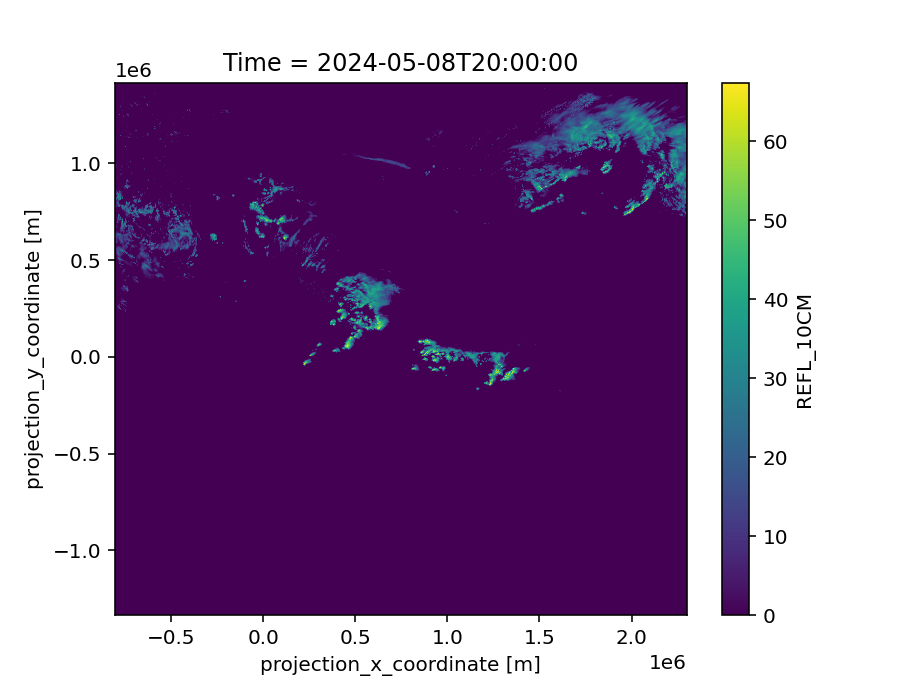

In [40]:
import panel.widgets as pnw

time = pnw.Player(name='Time', start=0, end=2, loop_policy='loop', interval=100)

refl.load()

refl.interactive(loc='bottom').isel(Time=time).plot()

In [42]:
refl[0].max(), refl[1].max(), refl[2].max()

(<xarray.DataArray 'REFL_10CM' ()> Size: 8B
 array(67.43557739)
 Coordinates:
     Time     datetime64[ns] 8B 2024-05-08T20:00:00,
 <xarray.DataArray 'REFL_10CM' ()> Size: 8B
 array(67.76957703)
 Coordinates:
     Time     datetime64[ns] 8B 2024-05-08T20:05:00,
 <xarray.DataArray 'REFL_10CM' ()> Size: 8B
 array(68.57359314)
 Coordinates:
     Time     datetime64[ns] 8B 2024-05-08T20:10:00)